# CIFAR100 VTAB FGVC中每类的数目分析

In [4]:
%cd /home/zxy/SSF
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets.folder import ImageFolder, default_loader
import torchvision
from data import create_dataset

/home/zxy/SSF


/home/zxy/miniconda3/envs/ssfn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
classes = {}
classes['cifar100']=[500]*100

In [ ]:
print(len(classes))
print(classes)
for name,data in classes.items():
    print(name,data)

## 获取数据

### CIFAR100

In [ ]:
# 加载 CIFAR-100 数据集
# transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR100(root='/data/datasets/cifar100', train=True, download=True)

# 获取类别名称
class_names = trainset.classes

# 初始化类别计数字典
class_counts = {class_name: 0 for class_name in class_names}

# 遍历训练集，统计每个类别的数量
for _, target in trainset:
    class_name = class_names[target]
    class_counts[class_name] += 1

# 打印每个类别的数量
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


### VTAB

In [17]:
data_path="/data/datasets/VTAB/VTAB/vtab-1k"
method_name="ssf"
method_name="linear_probe"
method_name="pruning"
log_path="vit_base_patch16_224_in21k/vtab"
# csv.reader(open(sys.argv[1], 'r'), delimiter=',')
# List all files in a directory using scandir()
# basepath = os.path.join(data_path,log_path)

In [18]:
def numofclasses( root, train=True):
    train_list_path = os.path.join(root, 'train800val200.txt')
    test_list_path = os.path.join(root, 'test.txt')

    # train_list_path = os.path.join(self.dataset_root, 'train800.txt')
    # test_list_path = os.path.join(self.dataset_root, 'val200.txt')

    samples = []
    if train:
        with open(train_list_path, 'r') as f:
            for line in f:
                # img_name = line.split(' ')[0]
                label = int(line.split(' ')[1])
                samples.append(label)
                # samples.append((os.path.join(root,img_name), label))
                
    else:
        with open(test_list_path, 'r') as f:
            for line in f:
                # img_name = line.split(' ')[0]
                label = int(line.split(' ')[1])
                # samples.append((os.path.join(root,img_name), label))
    # print(type(samples[0]))
    maxi=max(samples)
    data=[0]*(maxi+1)
    for i in samples:
        data[i]+=1
        
    # data_x=[i for i in range(maxi+1)]
    # # plt.figure(figsize=(10,5))
    # plt.scatter(data_x,data,s=1,c='red')
    # plt.show()
    
    # print(type(data))
    npdata=np.array(data)
    print('     Mean',np.mean(npdata))
    print('     Var',np.var(npdata))
    
    
    return data

with os.scandir(data_path) as datasets:
    for dataset in datasets:
        # print(dataset.name)
        if dataset.is_dir():
            with os.scandir(dataset) as datas:
                for data in datas:
                    if data.name=='train800val200.txt':
                        print(dataset.name)
                        data_list=numofclasses(dataset)
                        classes[dataset.name]=data_list
        # break


sun397
     Mean 2.525252525252525
     Var 7.83017039077645
oxford_iiit_pet
     Mean 27.027027027027028
     Var 15.485756026296565
smallnorb_ele
     Mean 111.11111111111111
     Var 155.87654320987656
clevr_count
     Mean 125.0
     Var 107.0
clevr_dist
     Mean 166.66666666666666
     Var 3213.222222222222
caltech101
     Mean 9.803921568627452
     Var 5.6870434448289116
resisc45
     Mean 22.22222222222222
     Var 20.306172839506175
kitti
     Mean 250.0
     Var 8744.0
diabetic_retinopathy
     Mean 200.0
     Var 72650.8
smallnorb_azi
     Mean 55.55555555555556
     Var 51.24691358024691
dsprites_ori
     Mean 62.5
     Var 145.75
oxford_flowers102
     Mean 9.803921568627452
     Var 3.157631680123029
dmlab
     Mean 166.66666666666666
     Var 1076.888888888889
svhn
     Mean 100.0
     Var 1713.6
cifar
     Mean 10.0
     Var 8.44
patch_camelyon
     Mean 500.0
     Var 16.0
eurosat
     Mean 100.0
     Var 292.0
dtd
     Mean 21.27659574468085
     Var 13.6894522408329

### FGVC

In [24]:
dataset='oxford_flowers'
data_dir='/data/datasets/FGVC/flowers102'
data=[['oxford_flowers','/data/datasets/FGVC/flowers102'],
      ['cub2011','/data/datasets/FGVC'],
      ['nabirds','/data/datasets/FGVC'],
      ['stanford_cars','/data/datasets/FGVC/cars'],
      ['stanford_dogs','/data/datasets/FGVC/stanford_dogs']]

oxford_flowers
2040


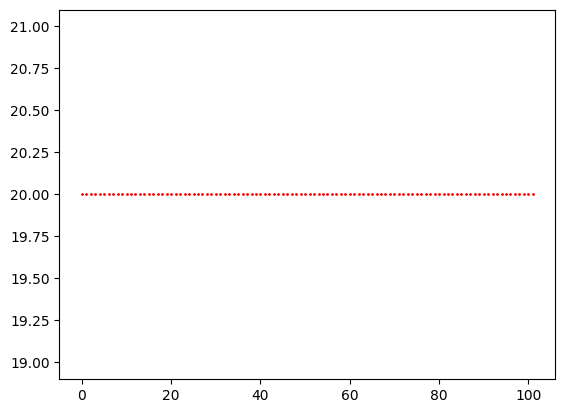

     Mean 20.0
     Var 0.0
cub2011


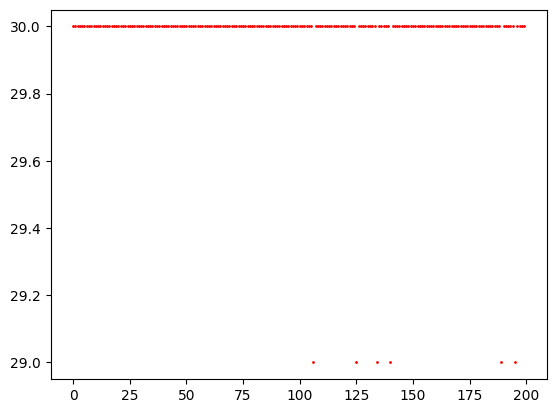

     Mean 29.97
     Var 0.029100000000000015
nabirds


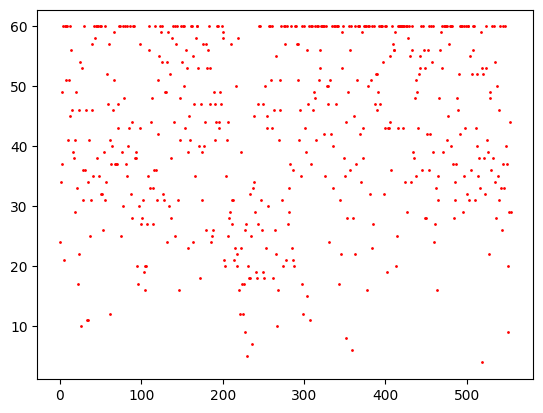

     Mean 43.115315315315314
     Var 214.8515672429186
stanford_cars
8144


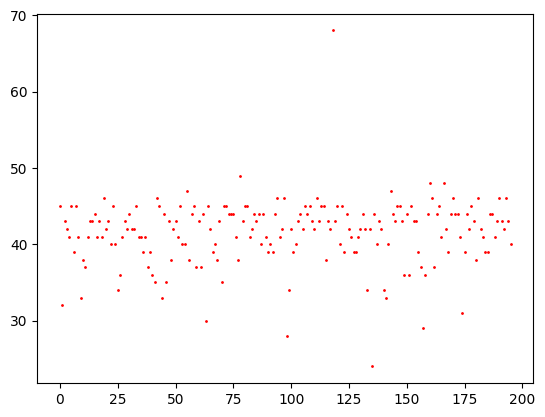

     Mean 41.55102040816327
     Var 18.686172428154936
stanford_dogs


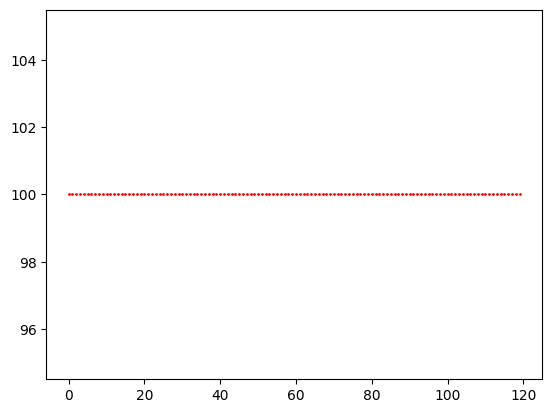

     Mean 100.0
     Var 0.0


In [25]:
def fgvc_solver(dataset,data_dir):
    print(dataset)
    trainset = create_dataset(dataset, root=data_dir, split='train', is_training=True)
    # 遍历训练集，统计每个类别的数量
    samples=[]
    for _, target in trainset:
        # print(target)
        samples.append(target)
    maxi=max(samples)
    data=[0]*(maxi+1)
    for i in samples:
        data[i]+=1
        
    data_x=[i for i in range(maxi+1)]
    # plt.figure(figsize=(10,5))
    plt.scatter(data_x,data,s=1,c='red')
    plt.show()

    # print(type(data))
    npdata=np.array(data)
    print('     Mean',np.mean(npdata))
    print('     Var',np.var(npdata))
    
    return data

for x in data:
    data_list=fgvc_solver(x[0],x[1])
    classes[x[0]]=data_list

## 处理数据

In [2]:
import pickle
def msaver(dict_):
    
    with open('./analysis_ipynb/classes.pkl', 'wb') as f:
	    pickle.dump(dict_, f)

def mreader(path):
    with open(path, 'rb') as f:
	    mclass = pickle.load(f)
    return mclass


In [5]:
# msaver(classes)
mclass=mreader('./analysis_ipynb/class.pkl')

In [6]:
for name,data in mclass.items():
    num=len(data)
    array=np.array(data)
    print(f'{name:25},Mean:{np.mean(array):>8.2f}\t\t,Var:{np.var(array):>15.2f}\t,Nums;{num:>6}')

cifar100                 ,Mean:  500.00		,Var:           0.00	,Nums;   100
sun397                   ,Mean:    2.53		,Var:           7.83	,Nums;   396
oxford_iiit_pet          ,Mean:   27.03		,Var:          15.49	,Nums;    37
smallnorb_ele            ,Mean:  111.11		,Var:         155.88	,Nums;     9
clevr_count              ,Mean:  125.00		,Var:         107.00	,Nums;     8
clevr_dist               ,Mean:  166.67		,Var:        3213.22	,Nums;     6
caltech101               ,Mean:    9.80		,Var:           5.69	,Nums;   102
resisc45                 ,Mean:   22.22		,Var:          20.31	,Nums;    45
kitti                    ,Mean:  250.00		,Var:        8744.00	,Nums;     4
diabetic_retinopathy     ,Mean:  200.00		,Var:       72650.80	,Nums;     5
smallnorb_azi            ,Mean:   55.56		,Var:          51.25	,Nums;    18
dsprites_ori             ,Mean:   62.50		,Var:         145.75	,Nums;    16
oxford_flowers102        ,Mean:    9.80		,Var:           3.16	,Nums;   102
dmlab                    

<Figure size 640x480 with 0 Axes>

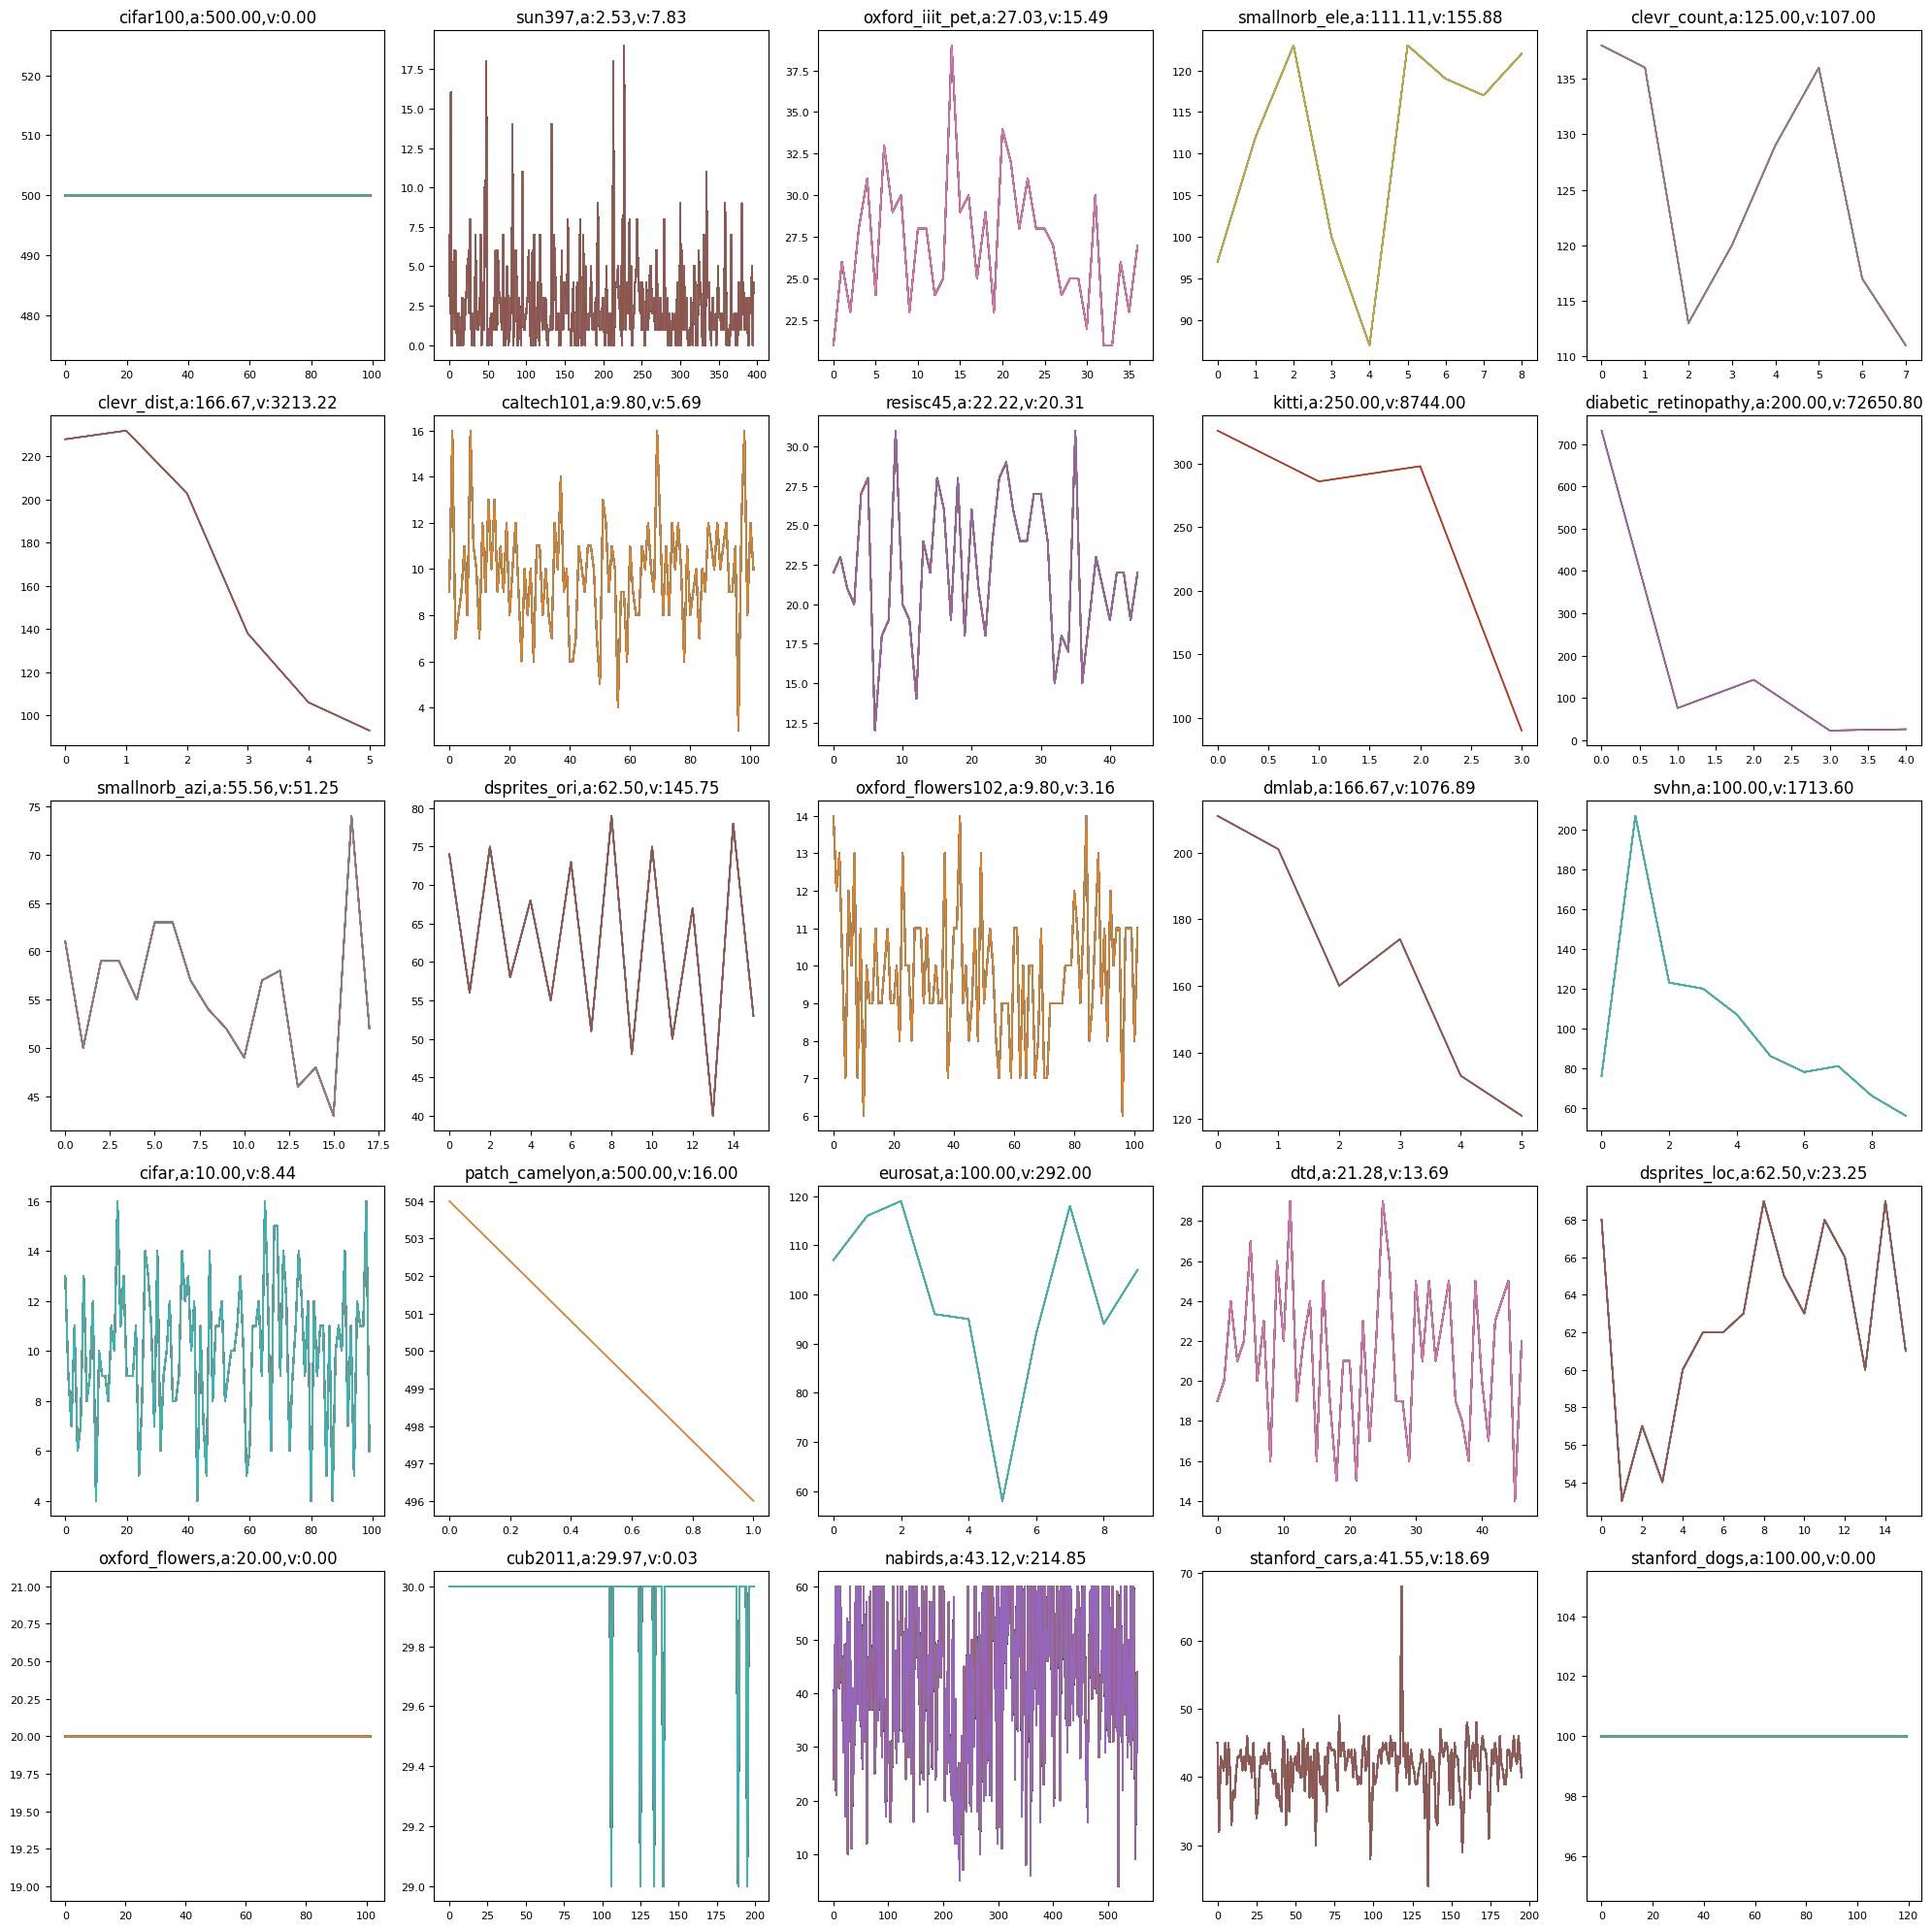

In [7]:
row=5
subp_num=len(mclass)
col=int(np.ceil(subp_num/row))
plt.clf()
fig, axs = plt.subplots(ncols=col, nrows=row, sharey=False, sharex=False)#sharey='all')#,gridspec_kw={"hspace": 0, "wspace": 0})
fig.set_size_inches(20, 20)

for i,(name,data) in enumerate(mclass.items()):
    
    
    # plot subplot 
    for j in range(len(data)):
        axs[i//5,i%5].plot(data,linewidth=1)
        # axs[i//5,i%5].scatter(j,data[j],s=2)
    # Adjust tick label size
    
    data=np.array(data)
     
    axs[i // col, i % col].tick_params(axis='both', which='both', labelsize=8)  
    # add label 
    label="{},a:{:.2f},v:{:.2f}".format(name,np.mean(data),np.var(data))
    axs[i//col,i%col].set_title(label)
    
    # add legend
    # axs[i//col,i%col].legend([f"eval_loss",f"train_loss"],loc='upper right')
    # axs[i//col,i%col].legend()
plt.tight_layout()
# plt.savefig("losses.png",dpi=300)
plt.show()